## Utkarsha Vidhale
# grad-admissions

 - [Data Scourse](https://www.kaggle.com/mohansacharya/graduate-admissions) 



This dataset is created for prediction of Graduate Admissions from an Indian perspective.


### Libraries used:

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [4]:
ap = pd.read_csv('ap.csv')
ap.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
ap1 = pd.read_csv('apv1.csv')
ap1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Droping column 'Serial No.'

In [6]:
ap=ap.drop(columns=['Serial No.'])
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


#### Converting 'Research' from int to bool

In [7]:
ap['Research bool'] = np.where(ap['Research']==0, 0, 1).astype(bool)
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
 8   Research bool      400 non-null    bool   
dtypes: bool(1), float64(4), int64(4)
memory usage: 25.5 KB


In [8]:
ap=ap.drop(columns=['Research'])
ap.describe(include="all")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research bool
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.724350,NaN
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.142609,NaN
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000,NaN
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.640000,NaN
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.730000,NaN
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,0.830000,NaN


In [9]:
ap.shape
ap.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance of Admit ', 'Research bool'],
      dtype='object')

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 ) 

TOEFL Scores ( out of 120 ) 

University Rating ( out of 5 ) 

Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 

Undergraduate GPA ( out of 10 ) 

Research Experience ( either 0 or 1 ) 

Chance of Admit ( ranging from 0.34 to 0.97 ) 

### Standardization 

In [11]:
from sklearn import preprocessing
# Get column names first
names = ap.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ap)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.describe(include="all")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research bool
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-4.174439e-16,5.595524e-16,7.105427e-17,7.993606e-17,-1.332268e-16,7.771561e-16,-3.375078e-16,-3.996803e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.339367e+00,-2.542098e+00,-1.827457e+00,-2.386613e+00,-2.733036e+00,-3.020504e+00,-2.698500e+00,-1.099975e+00
25%,-7.685900e-01,-7.274920e-01,-9.520286e-01,-8.949798e-01,-5.042604e-01,-7.201909e-01,-5.922168e-01,-1.099975e+00
50%,1.679859e-02,-6.763531e-02,-7.660001e-02,9.944220e-02,5.293342e-02,1.859559e-02,3.966834e-02,9.091117e-01
75%,7.149218e-01,7.571856e-01,7.988286e-01,5.966532e-01,6.101273e-01,7.783704e-01,7.417629e-01,9.091117e-01
max,2.023903e+00,2.076899e+00,1.674257e+00,1.591075e+00,1.724515e+00,2.218165e+00,1.724695e+00,9.091117e-01


### Relating variables

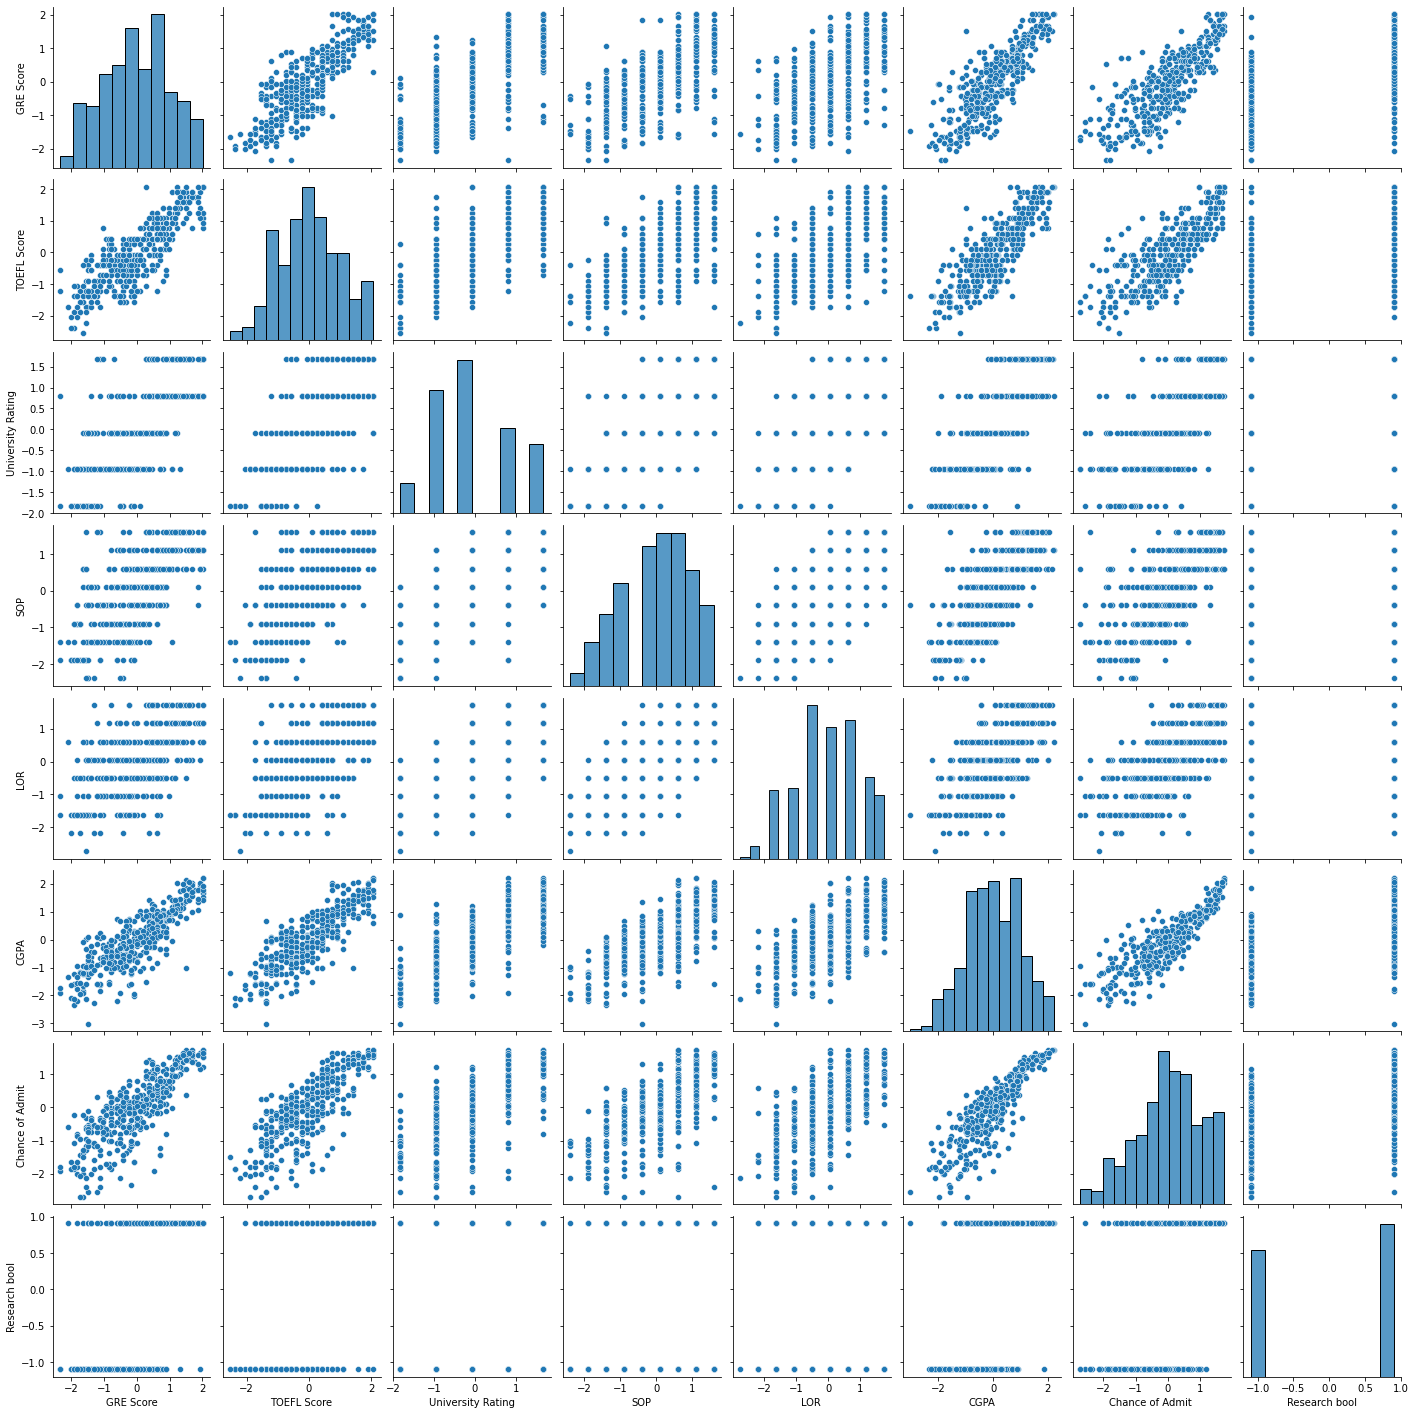

In [15]:
sns.pairplot(scaled_df)

  From the above graph, it can be infered that `Chance of admit` is linearly related to most of the quantitative variables available. To get more detailed correlations, heatmat is plotted with respective co-efficients.

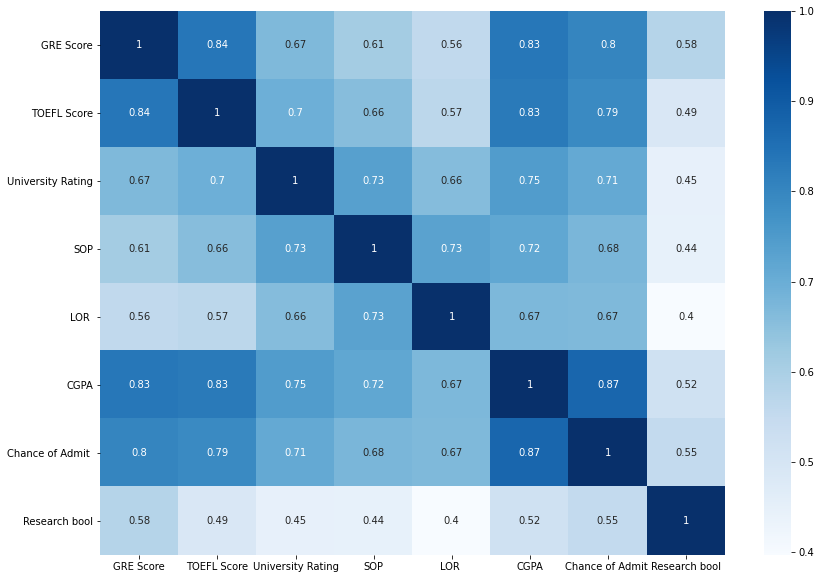

In [16]:
correlation_matrix = scaled_df.corr()
figure = plt.figure(figsize = (14,10))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

The correlation coefficient measures the statistical stength of the reationshipt between two variables.  
Based on the above derieved coefficients, the `Chance of Admit`*Our variable of interest* is highly correlated 
 (Correlation measurement > +- 0.6 )  to following variables: 
 - `GRE Score` (highly correlated, might check variation inflation factor post processing)
 
 - `Toefl Score` 
 
 - `University Ranking`
 
 - `SOP`
 
 - `LOR`
 
 - `CGPA` (highly correlated, might check variation inflation factor post processing)

##### Analyzing `Chance of Admit` and `Research bool`

<AxesSubplot:xlabel='Research bool', ylabel='Chance of Admit '>

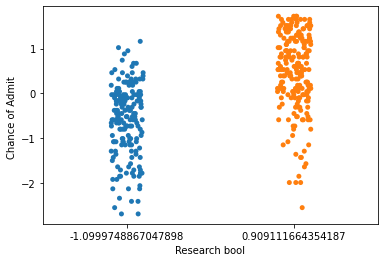

In [17]:
sns.stripplot(x=scaled_df['Research bool'],y=scaled_df['Chance of Admit '])

### Splittig the data

Size of dataset is relatively very less and hence, n cross-fold vaidation is used.

In [26]:
list(ap.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Chance of Admit ',
 'Research bool']

In [58]:
import statsmodels.api as sm
X=np.array(scaled_df.drop(['Chance of Admit '],1))
y=np.array(scaled_df['Chance of Admit '])
X= sm.add_constant(X)

In [59]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=rs)

In [60]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((80, 8), (80,), (320, 8), (320,))

### Linear regression

In [61]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          1.97e-103
Time:                        10:48:11   Log-Likelihood:                -189.00
No. Observations:                 320   AIC:                             394.0
Df Residuals:                     312   BIC:                             424.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0172      0.025      0.695      0.4

In [62]:
model = sm.OLS(y_test, X_test)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     59.69
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           1.89e-27
Time:                        10:48:15   Log-Likelihood:                -46.475
No. Observations:                  80   AIC:                             108.9
Df Residuals:                      72   BIC:                             128.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0703      0.053     -1.336      0.1